## MapWorld
---
This notebook shows how to implement a MapWorld Environment and setup a dummy agent to explore the environment
This is divided into the following sections
- Setup a Graph - This is a base topological layout
- Create a Map - This takes the Graph and assigns room categories and images to its nodes
- Create an environment - This takes the Map and implements an OpenAI Gym wrapper over it and sets up a dummy agent to explore the environment

### 1) Create Graphs
---

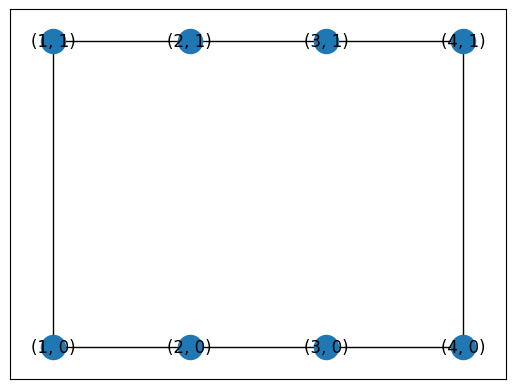

In [1]:
from mapworld.engine.graphs import BaseGraph

# Setup base layout of the Grid - mxn grid with n_rooms
Graph = BaseGraph(m=5, n=5, n_rooms=8, seed=42)

# Setup a graph type from - Cycle, Path, Star, Tree, Ladder
# Refer mapworld/engine/tests/graph_images to see how each structure looks like
cycle_graph = Graph.create_cycle_graph()

# Example of Cycle Graph
Graph.plot_graph(cycle_graph)


### 2) Create a Map
---

Assign Room Categories and Images to the nodes in the above graph and return the metadata

This requires the following files under `mapworld/engine/resources` -
- `config.json` - This file defines the file names for categories and image definitions, and keys for the categories
- `categories.json` - This file defines the different category classes and what type of rooms fall into each class. This requires three different category classes, and their keywords setup in `config.json`. The current config contains the classes from [Sempix Mapworld](https://github.com/clp-research/sempix/tree/master/03_Tasks/MapWorld)
- `images.json` - This file contains the set of image paths for each room type defined in `categories.json`. The current config contains the images from [ADE20K dataset](https://ade20k.csail.mit.edu/).
- The categories and corresponding images can be customised by changing the respective jsons, or defining new ones and setting them up in `config.json`.

#### Args for generating metadata
- ambiguity - This defines number of ambiguous rooms (rooms having same category). Example - ambiguity of [3,2] means there are 3 rooms of category A, 2 rooms of category B and the remaining rooms have unique categories and not from A/B. If n_rooms is 6, for the above ambiguity we might get - room categories as - Kitchen 1, Kitchen 2, Kitchen 3, Bedroom1, Bedroom2, Attic
- ambiguity_region -  Select from indoor/outdoor/random. When generating the metadata, each node is assigned either indoor or outdoor depending on its degree. Based on the ambiguity region, one can define where these ambiguous rooms are assigned. For example selecting outdoor, all ambiguous rooms are assigned to nodes having `degree = 1`. Setting it random would assign ambiguous rooms randomly from indoor + outdoor
- start_type/end_type - Select from indoor/outdoor/ambiguous/random.
- distance - The distance between the start and end nodes

In [2]:
from mapworld.engine.maps import BaseMap

# This class inherits from BaseGraph
# Setup graph_type from cycle, star, ladder, tree, path
Map = BaseMap(n=5, m=5, n_rooms=8, graph_type="cycle", seed=42)

metadata = Map.metadata(start_type="indoor", end_type="ambiguous", ambiguity=[2,2], ambiguity_region="indoor", distance=4)
print(metadata)



{'graph_id': '10b11r20c21b30a31r40r41m', 'm': 5, 'n': 5, 'named_nodes': ['Bedroom', 'Reception', 'Computer room', 'Bedroom', 'Art studio', 'Reading room', 'Reading room', 'Music studio'], 'unnamed_nodes': ['(1, 0)', '(1, 1)', '(2, 0)', '(2, 1)', '(3, 0)', '(3, 1)', '(4, 0)', '(4, 1)'], 'named_edges': [('Bedroom', 'Computer room'), ('Bedroom', 'Reception'), ('Reception', 'Bedroom'), ('Computer room', 'Art studio'), ('Bedroom', 'Reading room'), ('Art studio', 'Reading room'), ('Reading room', 'Music studio'), ('Reading room', 'Music studio')], 'unnamed_edges': [('(1, 0)', '(2, 0)'), ('(1, 0)', '(1, 1)'), ('(1, 1)', '(2, 1)'), ('(2, 0)', '(3, 0)'), ('(2, 1)', '(3, 1)'), ('(3, 0)', '(4, 0)'), ('(3, 1)', '(4, 1)'), ('(4, 0)', '(4, 1)')], 'node_to_category': {'(1, 0)': 'Bedroom', '(1, 1)': 'Reception', '(2, 0)': 'Computer room', '(2, 1)': 'Bedroom', '(3, 0)': 'Art studio', '(3, 1)': 'Reading room', '(4, 0)': 'Reading room', '(4, 1)': 'Music studio'}, 'node_to_image': {'(1, 0)': 'https://www.

### 3) Create Environment
---



In [3]:
from mapworld.engine.environment import MapWorldEnv

env = MapWorldEnv(render_mode="human", size=5, map_metadata=metadata)
env.reset()
env.render()

# Sample moves
moves = [0, 0, 0, 3, 2, 2, 2, 1]
for a in moves:
    env.render()
    env.step(a)

gif_path = env.record_video()
print("Saved:", gif_path)

env.close()


2025-10-04 13:41:52.133 python[10421:473348] +[IMKClient subclass]: chose IMKClient_Modern
2025-10-04 13:41:52.133 python[10421:473348] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Saved: /Users/kushalkoshti/WORK/CLEM/clembench/mapworld/engine/resources/gifs/episode_20251004_134156.gif


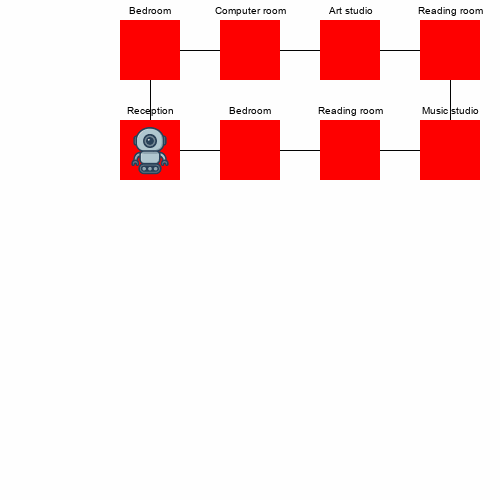

In [23]:
from pathlib import Path
from PIL import Image as PILImage, ImageSequence
from IPython.display import Image as IPyImage, display

src = Path("resources/gifs/episode_20251004_134842.gif")
dst = src.with_name(src.stem + "_slow.gif")

im = PILImage.open(src)
frames = [f.convert("RGBA") for f in ImageSequence.Iterator(im)]

frames[0].save(
    dst,
    save_all=True,
    append_images=frames[1:],
    duration=1000,
    loop=0,
    optimize=False,
    disposal=2,
)

display(IPyImage(data=dst.read_bytes()))
